In [ ]:
import numpy as np            #all the required import statements
import pandas as pd
import matplotlib as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
raw_data = pd.read_csv('p1dataset2021.txt', header=None,delim_whitespace=True)  # loading rawdata as a csv
df = raw_data.iloc[:,3:]                                                        # extracting the important data (the one required to perform PCA, rest of the 3 features have been cropped)
mode = df.mode()                                                                # extracted the mode of the data

for i in range(len(df.index)):  #rows  0 - 994                                  #conveting the data into binary data
    for j in range(3, df.shape[1]+3):  #col 3 - 10103
        if mode._get_value(0,j)==df._get_value(i,j):
            df._set_value(i,j,0)
        else:
            df._set_value(i,j,1)


In [ ]:
df.shape                                                                        #checking the shape of the matrix which is 995*10101

(995, 10101)

In [ ]:
population_type = raw_data.to_numpy()[:,2:3]                #storing the population-type vector   
gender_list = raw_data.to_numpy()[:,1:2]                    #storing the gender vector   
y = population_type

In [ ]:
sdata = preprocessing.scale(df)                             # standardizing the data 

In [ ]:
pca = PCA(n_components=2)                                   # declaring PCA with 2 components
pca.fit(sdata)                                              #performing pca.fit on the data
pca.components_                                             #got PCA components
print(pca)
print(pca.components_.shape)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
(2, 10101)


In [ ]:
Z = pca.transform(sdata)                                #transforming the PCA data and storing it in Z
print(Z.shape)                                                 #checking the shape of the PCA which is 995*2 since we needed 2 components
print(Z)
data_pc1_pc2 = Z                                         #data that will be used for plotting PC1 and PC2

(995, 2)
[[ 1.06694682e+01 -1.51109368e+00]
 [ 2.65618791e+01  4.94208166e+00]
 [ 2.02249652e+01  1.58109075e+00]
 ...
 [ 1.79369504e+01  1.31742450e-02]
 [ 1.25195139e+01 -1.25836689e+00]
 [ 4.71976421e+00 -1.22503614e-01]]


In [ ]:
ppntype = list()                            #creating a list to store the distinct population type values, this is done to set the legend
for i in y.tolist():                          #using a for loop to get the distinct values
    if i[0] in ppntype:
        continue
    else:
        ppntype.append(i[0])
populationlist= list()                      #creating a new list to store all the population_type values in a proper list
for i in y.tolist():                        #for loop to store all the values of ppntype in a single list
  populationlist.append(i[0])
print(populationlist)

['ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'GWD', 'GWD', 'GWD', 'GWD', 'GWD', 'GWD', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'ACB', 'GWD', 'GWD', 'GWD', 'GWD', 'GWD', 'GWD', 'GWD', 'GWD', 'GWD', 'GWD', 'GWD', 'GWD', 'ACB', 'ACB', 'GWD', 'GWD', 'GWD'

In [ ]:
data_pc1_pc2 = pd.DataFrame(data=data_pc1_pc2,columns=["PC1","PC2"])        # making a dataframe for easier plotting and visualization
data_pc1_pc2['target']=populationlist                                       #appending target(population type) to the data
data_pc1_pc2

,PC1,PC2,target
0,10.669468,-1.511094,ACB
1,26.561879,4.942082,ACB
2,20.224965,1.581091,ACB
3,-0.595255,-1.615998,ACB
4,7.824639,0.884825,ACB
...,...,...,...
990,18.768574,-0.199099,ASW
991,16.569662,0.419114,ASW
992,17.936950,0.013174,ASW
993,12.519514,-1.258367,ASW


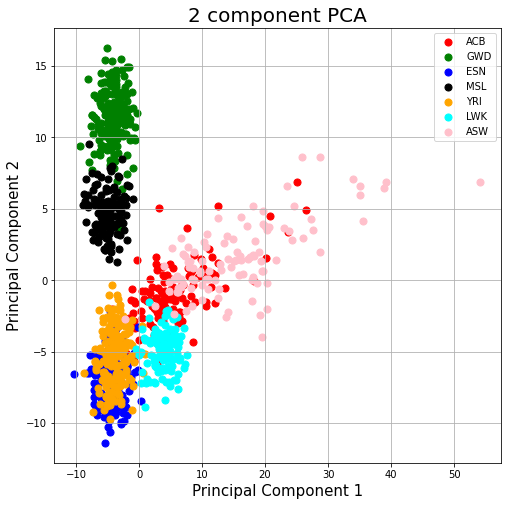

In [ ]:
fig = plt.figure(figsize = (8,8))               #plotting of the data
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)  
targets = ppntype                               #setting targets to ppntype which contains the distinct values of population type i.e. contains 7 values
colors = ['r', 'g', 'b','black','orange','cyan','pink']  #setting different colors for different population type
for target, color in zip(targets,colors):                       #for loop for scatter plot
    indicesToKeep = data_pc1_pc2['target'] == target
    ax.scatter(data_pc1_pc2.loc[indicesToKeep, 'PC1']
               , data_pc1_pc2.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca_2 = PCA(n_components=3)                                   # declaring PCA with 3 components
pca_2.fit(sdata)                                              #performing pca.fit on the data
pca_2.components_                                             #got PCA components

array([[-0.00801769, -0.00029172, -0.00256777, ...,  0.01499394,
        -0.00315523,  0.03683628],
       [-0.0065982 ,  0.01346276,  0.00526872, ...,  0.00364502,
        -0.00423038,  0.0035961 ],
       [ 0.00254417, -0.00029959,  0.00222772, ...,  0.01421037,
         0.00601445,  0.04079595]])

In [ ]:
Z1 = pca_2.transform(sdata)                                #transforming the PCA data and storing it in Z
print(Z1.shape)                                                 #checking the shape of the PCA which is 995*3 since we needed 3 components
print(Z1)
data_pc1_pc3 = Z1                                   #data that will be used for plotting PC1 and PC3

(995, 3)
[[10.67463405 -1.52895605  7.53700131]
 [26.58018548  4.95126863 -1.7350157 ]
 [20.24245862  1.57002392 -2.85417839]
 ...
 [17.95089814  0.04708129 -3.88556199]
 [12.53572479 -1.24618751 -4.14060846]
 [ 4.73815697 -0.1309458   6.20621842]]


In [ ]:
gender = list()                            #creating a list to store the distinct population type values, this is done to set the legend
for i in gender_list.tolist():                          #using a for loop to get the distinct values
    if i[0] in gender:
        continue
    else:
        gender.append(i[0])
gender_all= list()                      #creating a new list to store all the population_type values in a proper list
for i in gender_list.tolist():                        #for loop to store all the values of ppntype in a single list
  gender_all.append(i[0])
print(gender)
print(gender_all)

[1, 2]
[1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1,

In [ ]:
data_pc1_pc3 = pd.DataFrame(data=data_pc1_pc3,columns=["PC1","PC2","PC3"])        # making a dataframe for easier plotting and visualization
data_pc1_pc3['target']=gender_all                                       #appending target(population type) to the data
data_pc1_pc3

,PC1,PC2,PC3,target
0,10.674634,-1.528956,7.537001,1
1,26.580185,4.951269,-1.735016,2
2,20.242459,1.570024,-2.854178,2
3,-0.615253,-1.649414,7.384317,1
4,7.814412,0.896162,-5.656725,2
...,...,...,...,...
990,18.787026,-0.278680,-4.415103,2
991,16.586227,0.312987,5.215620,1
992,17.950898,0.047081,-3.885562,2
993,12.535725,-1.246188,-4.140608,2


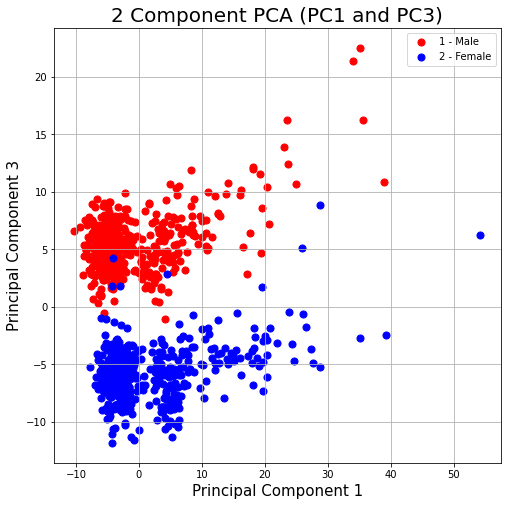

In [ ]:
fig = plt.figure(figsize = (8,8))               #plotting of the data
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA (PC1 and PC3)', fontsize = 20)  
targets = gender                               #setting targets to ppntype which contains the distinct values of population type i.e. contains 7 values
colors = ['r', 'b']  #setting different colors for different population type
for target, color in zip(targets,colors):                       #for loop for scatter plot
    indicesToKeep = data_pc1_pc3['target'] == target
    ax.scatter(data_pc1_pc3.loc[indicesToKeep, 'PC1']
               , data_pc1_pc3.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
ax.legend(["1 - Male","2 - Female"])
ax.grid()

In [ ]:
abs_pc3 = np.absolute(pca_2.components_[2])
abs_pc3
print(len(abs_pc3))
x_range = pca_2.components_[2].shape[0]
x_range = np.arange(1,x_range+1)

10101


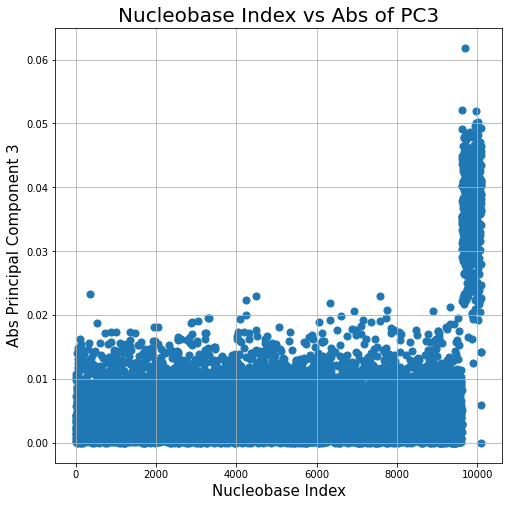

In [ ]:
fig = plt.figure(figsize = (8,8))               #plotting of the data
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Nucleobase Index', fontsize = 15)
ax.set_ylabel('Abs Principal Component 3', fontsize = 15)
ax.set_title('Nucleobase Index vs Abs of PC3', fontsize = 20)  
ax.scatter(x_range, abs_pc3, s = 50)
ax.grid()